In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_excel('Dataset.xlsx')

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Target
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# EDA

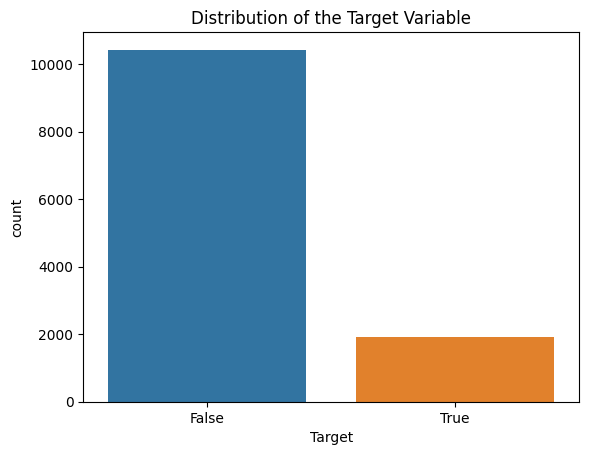

In [11]:
# Target Distribution
sns.countplot(data=df, x='Target')
plt.title('Distribution of the Target Variable')
plt.show()

In [12]:
# Checking categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(categorical_columns)}")

Categorical Columns: ['Month', 'VisitorType']


In [13]:
# Unique values in categorical columns
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Unique values in VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']


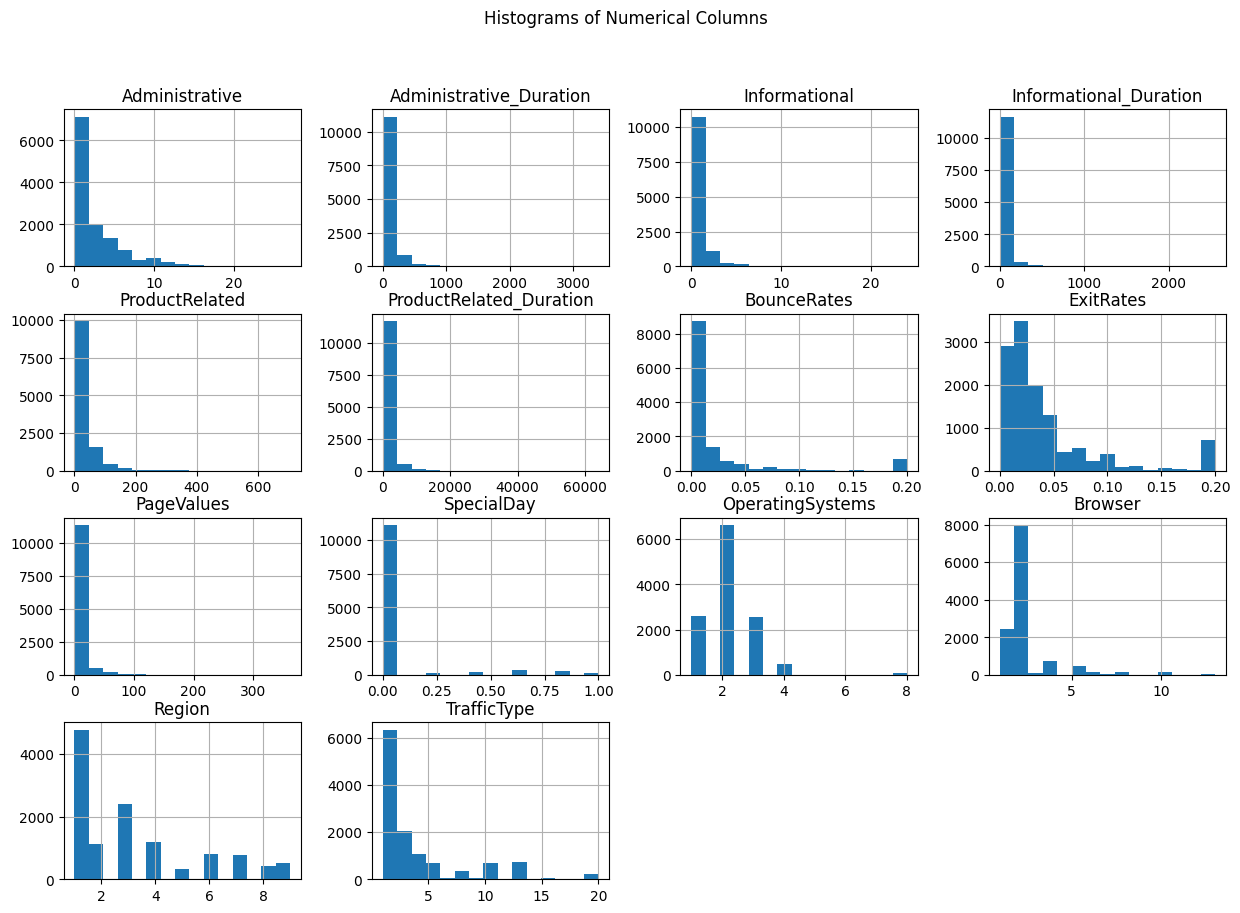

In [14]:
# Distribution of numerical features
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

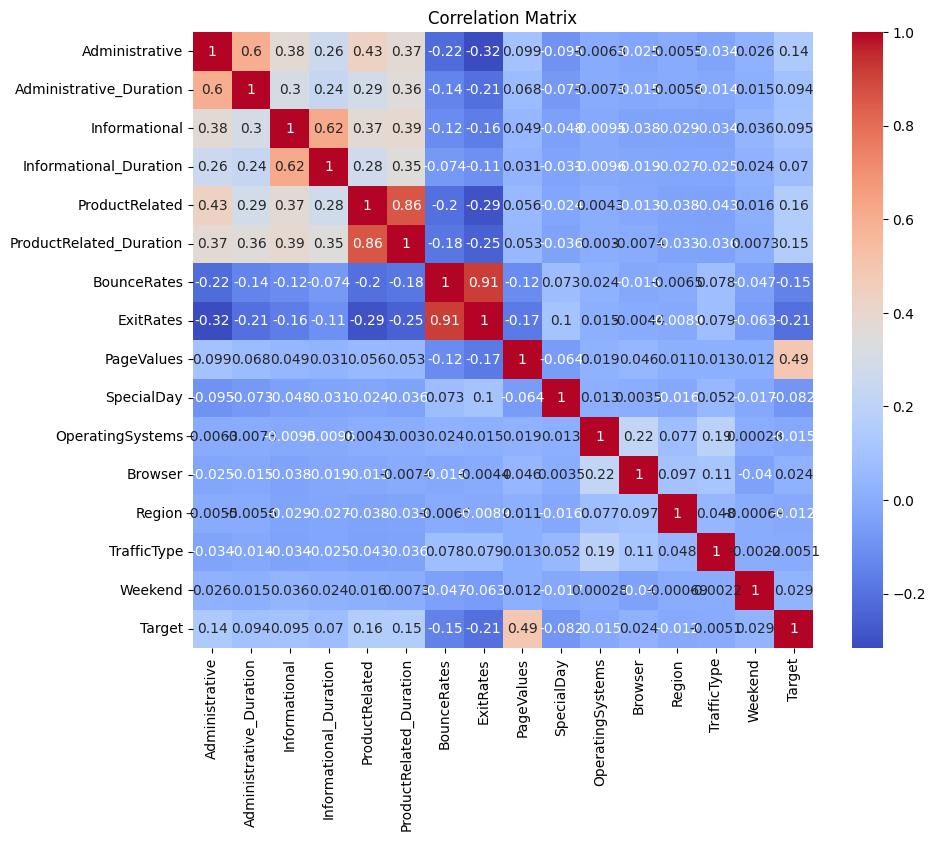

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

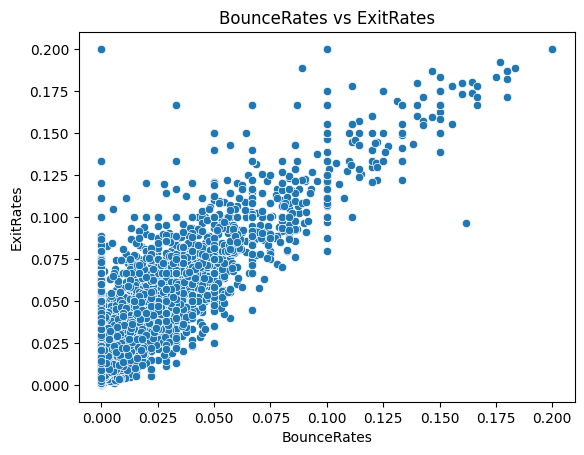

In [16]:
# Scatterplot of BounceRates vs ExitRates
sns.scatterplot(data=df, x='BounceRates', y='ExitRates')
plt.title('BounceRates vs ExitRates')
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


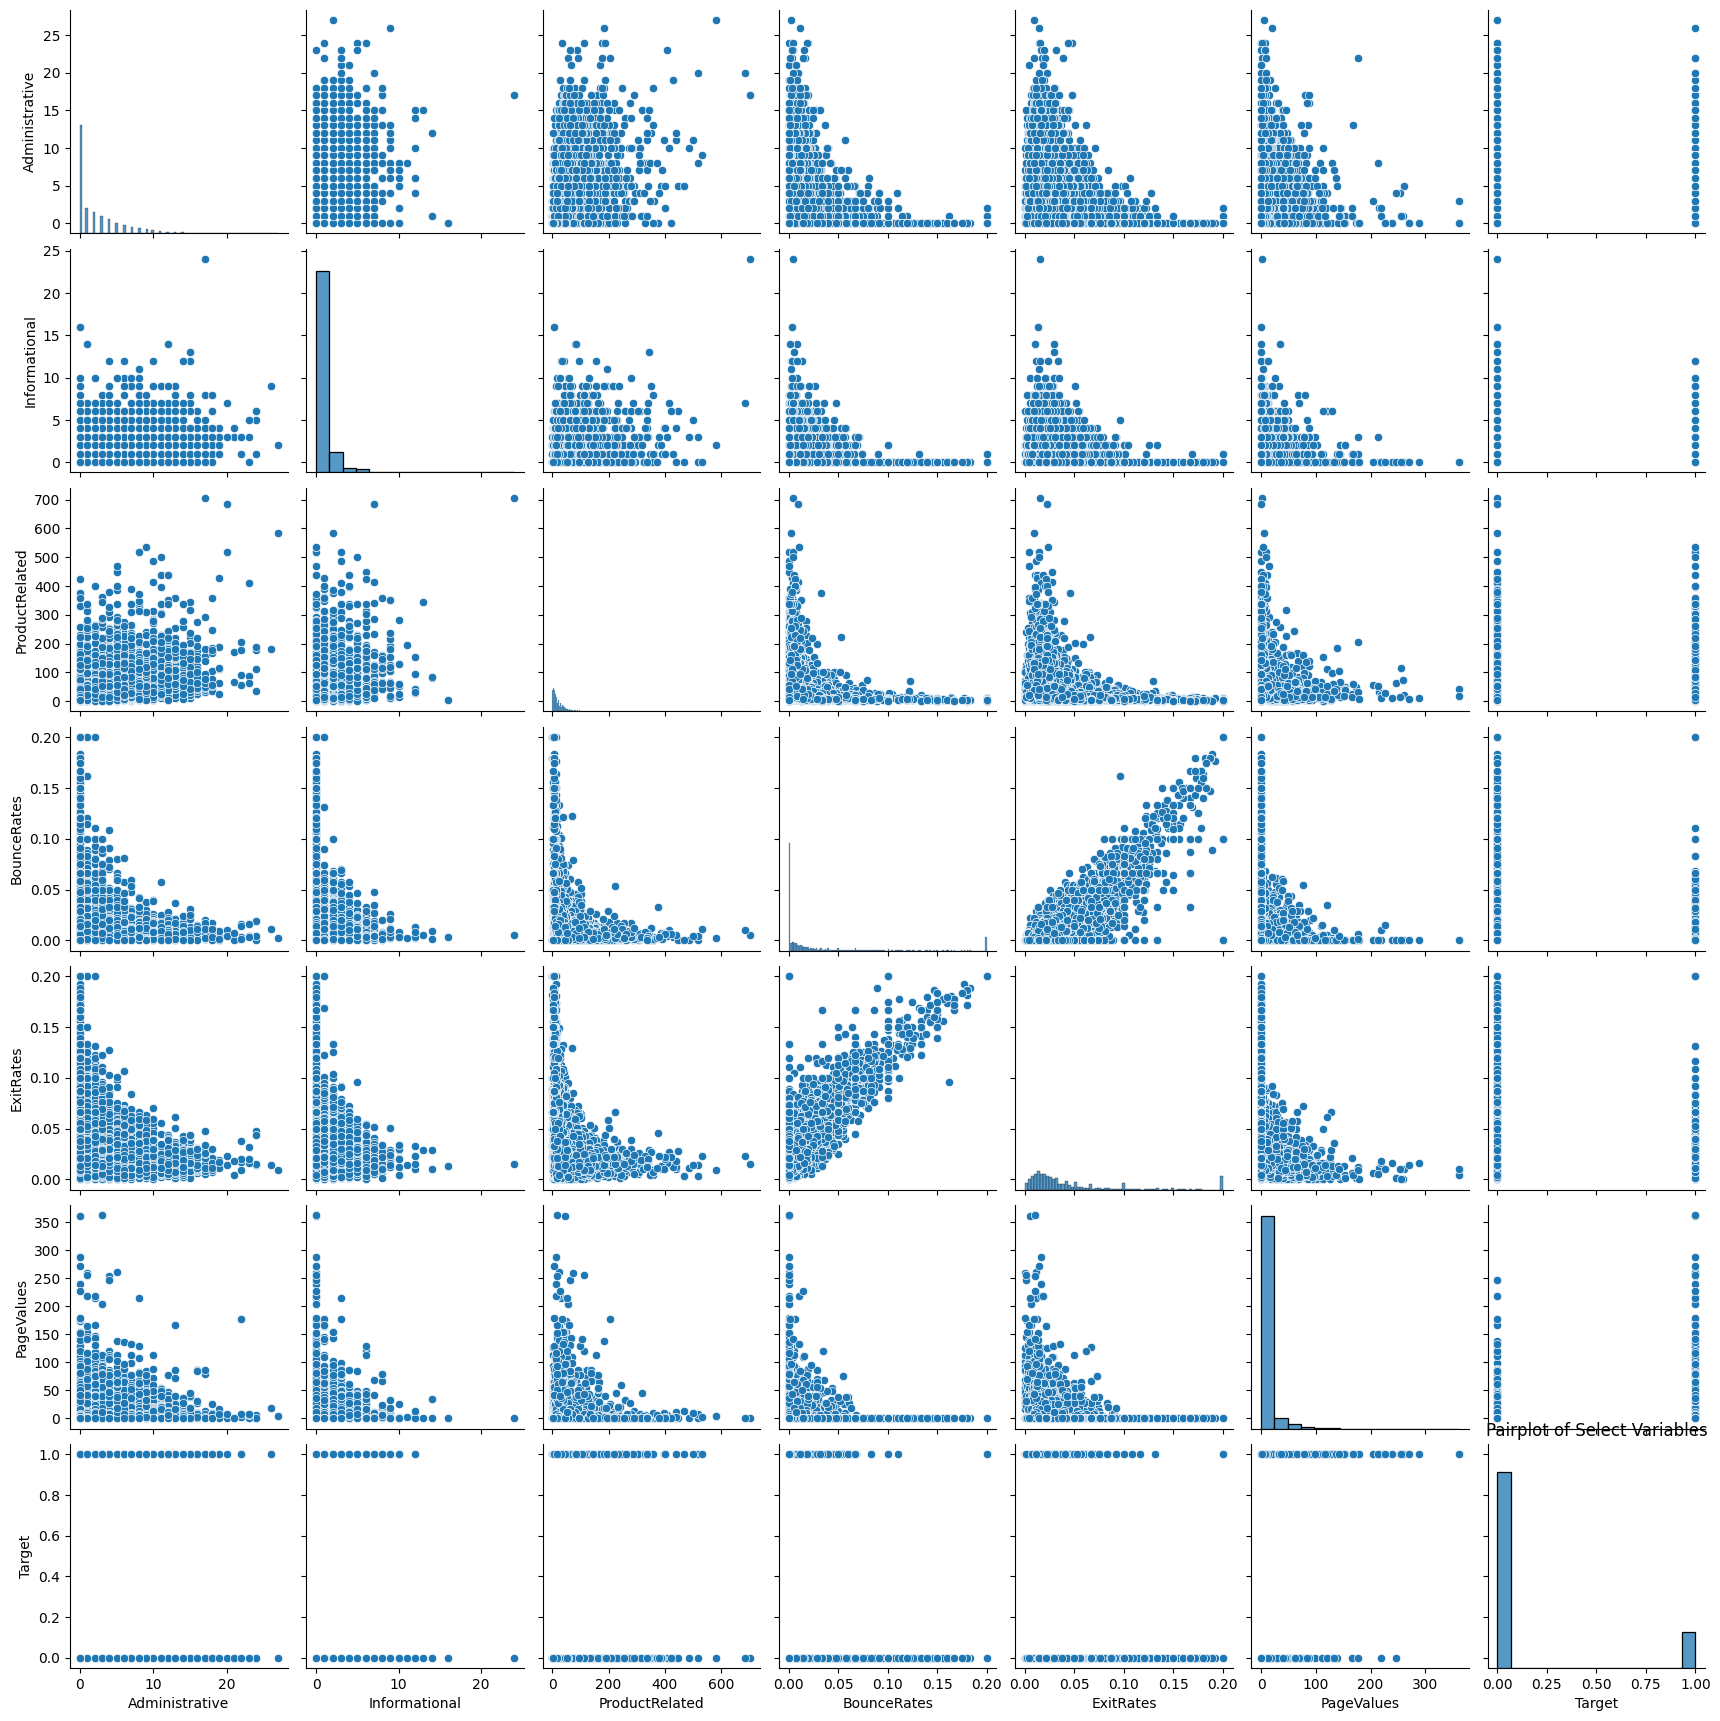

In [17]:
# Pairplot for first few columns
sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'Target']])
plt.title('Pairplot of Select Variables')
plt.show()

In [18]:
# Checking correlation between different features and the Target
correlation_with_target = df.corr()['Target'].sort_values(ascending=False)
print("Correlation of features with Target:")
print(correlation_with_target)

Correlation of features with Target:
Target                     1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Target, dtype: float64


In [20]:
# Encoding categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [21]:
# Split data into training and test sets
X = df_encoded.drop(columns='Target')
y = df_encoded['Target']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Feature Importance using RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_

In [25]:
# Plotting feature importance
indices = np.argsort(importances)[::-1]
features = X.columns

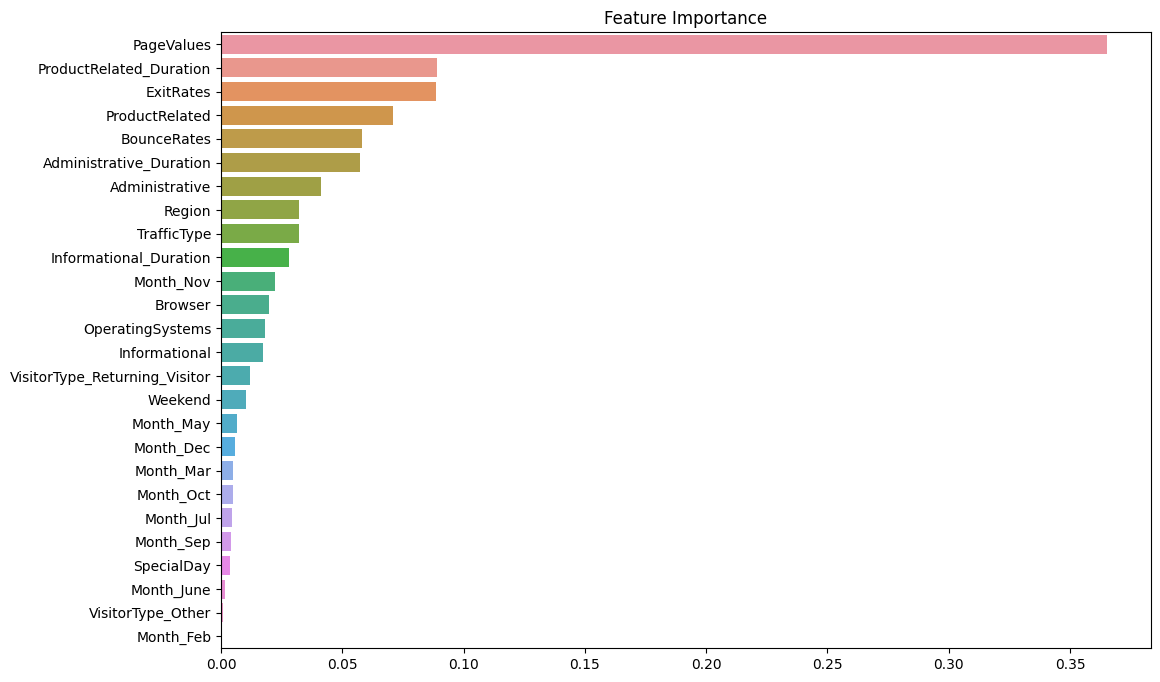

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.show()

In [27]:
# Model Development

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

In [28]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

In [29]:
# SVM Classifier
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

In [30]:
# Evaluation Metrics

# Accuracy Scores
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred)}")

Logistic Regression Accuracy: 0.8730738037307381
Random Forest Accuracy: 0.8925385239253852
SVM Accuracy: 0.8791565287915653

Confusion Matrix for RandomForest:
[[1977   78]
 [ 187  224]]


In [31]:
# Confusion Matrix
print("\nConfusion Matrix for RandomForest:")
print(confusion_matrix(y_test, rf_pred))


Confusion Matrix for RandomForest:
[[1977   78]
 [ 187  224]]


In [32]:
# Classification Report
print("\nClassification Report for RandomForest:")
print(classification_report(y_test, rf_pred))


Classification Report for RandomForest:
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2055
        True       0.74      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.89      2466



In [33]:
# ROC Curve and AUC Score
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm.predict_proba(X_test_scaled)[:, 1]
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]

rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

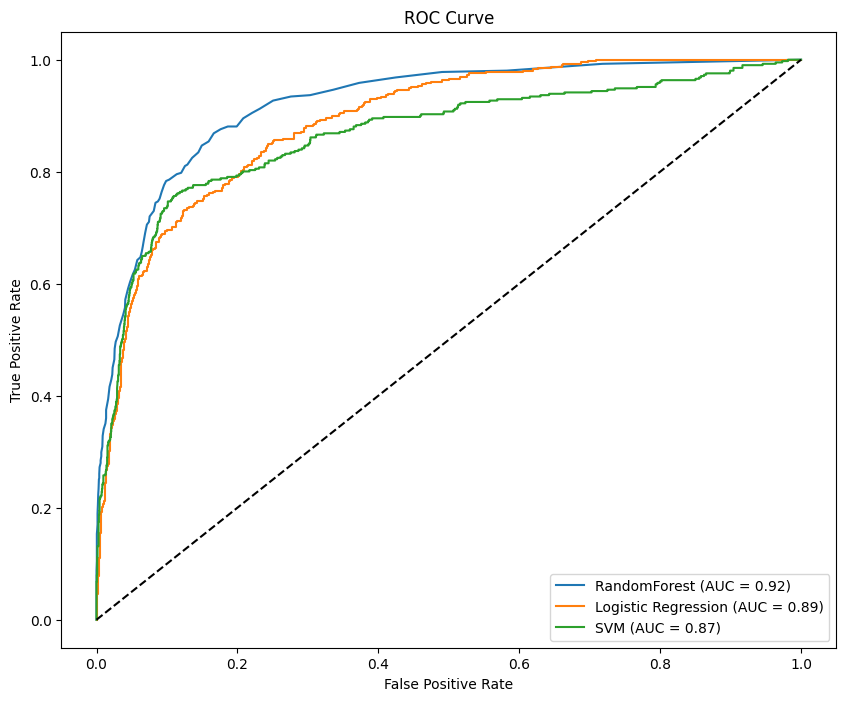

In [34]:
# Plotting ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {rf_auc:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [35]:
# Final Evaluation & Model Comparison

print(f"RandomForest AUC: {rf_auc}")
print(f"Logistic Regression AUC: {lr_auc}")
print(f"SVM AUC: {svm_auc}")

RandomForest AUC: 0.9212862817530089
Logistic Regression AUC: 0.8900480106085094
SVM AUC: 0.866630555111561


# Conclusion:

1.Random Forest is best suited model for this type of problem statement,as its accuracy outperformed others.

# Next Steps Can be taken/Mode of improvement:
1.Feature importance calculated using random forest states there are some features which are not of that importance for the model,these features can be dropped after consideration by domain expert.

2.Target feature is imbalanced,techniques such as oversaompling can be used to make it balanced,these can increase the accuracy of model.

3.While accuracy of 92% is acceptable but hyperparameter tuning can be used to increase it a bit.